In [2]:
# hataları gösterme
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt

#  Introduction -Açıklama
#### en
### "In this project, we will develop a Natural Language Processing (NLP) model based on the star ratings of Amazon reviews. Our goal is to classify the reviews and achieve a high accuracy score. If our model performs well, we will be able to predict the rating class (1, 2, 3, 4, or 5 stars) for new incoming reviews."

#### tr
### "Bu projede, Amazon yorumlarının yıldız değerlerine (rating) bakarak bir Doğal Dil İşleme (NLP) projesi geliştireceğiz. Amacımız, yorumları sınıflandırarak yüksek bir doğruluk oranı elde etmek. Eğer modelimiz iyi çalışırsa, yeni gelen yorumların hangi sınıfa (1, 2, 3, 4 veya 5 yıldız) gireceğini tahmin edebileceğiz."


# Datayı Yükleme , Çekme   /  Loading , Pulling Data

In [2]:
df=pd.read_csv('df_stema.csv')

In [4]:
df.shape

(399757, 9)

In [ ]:
#df.to_csv("amazon_yorumlari.csv", index=False) # kayt et

In [5]:
df.head(3)

,text,rating,day,month,year,sentiment,polarity,stemmed,lemmatized
0,well after trying out some box towersthat soun...,5,7,6,2011,natural,56.866162,well after tri out some box towersthat sound l...,well after try out some box towersthat sound l...
1,i ordered one for my wife and one for me after...,5,24,12,2009,pozitif,61.021212,i order one for my wife and one for me after r...,i order one for my wife and one for me after r...
2,muy buen producto a full en juegos fhd no hay ...,5,29,8,2011,pozitif,67.500000,muy buen producto a full en juego fhd no hay p...,muy buen producto a full en juegos fhd no hay ...


In [8]:
df.columns=['text','rating','date']
df.reset_index(drop=True, inplace=True)
df.head(3)

,text,rating,date
0,"Well, after trying out some Box Towers....that...",5,"06 7, 2011"
1,I ordered one for my wife and one for me. Afte...,5,"12 24, 2009"
2,muy buen producto... a full en juegos fHD.... ...,5,"08 29, 2011"


In [9]:
df['date'] = pd.to_datetime(df['date'])

df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df.head(3)

,text,rating,date,day,month,year
0,"Well, after trying out some Box Towers....that...",5,2011-06-07,7,6,2011
1,I ordered one for my wife and one for me. Afte...,5,2009-12-24,24,12,2009
2,muy buen producto... a full en juegos fHD.... ...,5,2011-08-29,29,8,2011


# Verilerimizi Aldığımız Göre Artık Nasıl bir yol haritası ve Amaç İzleyeceğimize yazabiliriz .

#  What we Do?


## Text Preprocessing Steps
1. **Read the Data**
   - Load your data into a DataFrame (e.g., using `pandas`).

2. **Convert to Lowercase**
   - Transform all text to lowercase to ensure consistency.

3. **Remove Punctuation**
   - Eliminate punctuation marks from the text (e.g., using `re`).

4. **Remove Numbers**
   - Remove all numerical digits from the text.

5. **Remove Line Breaks**
   - Remove any line breaks or newline characters to maintain a continuous text flow.

6. **Remove Stop Words**
   - Eliminate common stop words that do not add significant meaning to the text (e.g., using `nltk`).

7. **Tokenize Text**
   - Break down the text into individual tokens or words.

8. **Stemming and Lemmatization**
   - Reduce words to their root forms using stemming or lemmatization techniques.

9. **Vectorize the Text**
   - Convert the text into numerical vectors for machine learning models (e.g., using `scikit-learn`).

10. **TF-IDF**
    - Apply Term Frequency-Inverse Document Frequency (TF-IDF) to weigh the importance of words in the document.
-------

## Metin Ön İşleme Adımları

1. **Veriyi Okuma**
   - Verinizi bir DataFrame'e yükleyin (örneğin, `pandas` kullanarak).

2. **Küçük Harfe Çevirme**
   - Tüm metni küçük harfe dönüştürerek tutarlılık sağlayın.

3. **Noktalama İşaretlerini Kaldırma**
   - Metinden noktalama işaretlerini çıkarın (örneğin, `re` kullanarak).

4. **Rakamları Kaldırma**
   - Metinden tüm sayısal rakamları çıkarın.

5. **Satır Sonlarını Kaldırma**
   - Satır sonlarını veya yeni satır karakterlerini kaldırarak sürekli bir metin akışı sağlayın.

6. **Stop Word’leri Kaldırma**
   - Anlam açısından önemli olmayan yaygın kelimeleri çıkarın (örneğin, `nltk` kullanarak).

7. **Tokenize Etme**
   - Metni bireysel token’lara veya kelimelere ayırın.

8. **Ekleri Kaldırma ve Kökleri Bulma (Stemming ve Lemmatization)**
   - Kelimeleri kök formlarına indirgeyin (örneğin, stemming veya lemmatization kullanarak).

9. **Vektörleştirme**
   - Metni sayısal vektörlere dönüştürün (örneğin, `scikit-learn` kullanarak).

10. **TF-IDF Uygulama**
    - Terim Frekansı-Ters Doküman Frekansı (TF-IDF) uygulayarak kelimelerin önemini değerlendirin.


-------------

#  1. Veriyi okuma - Reading data

In [10]:
df.head(3)

,text,rating,date,day,month,year
0,"Well, after trying out some Box Towers....that...",5,2011-06-07,7,6,2011
1,I ordered one for my wife and one for me. Afte...,5,2009-12-24,24,12,2009
2,muy buen producto... a full en juegos fHD.... ...,5,2011-08-29,29,8,2011


In [11]:
df.text[5]

'Well made, priced right & works like it should. What more could you ask? I\'m using this mounted directly to the ceiling. The adjustment controls work great and the unit locks down solid after installation & adjustment. To be ultra picky, I would prefer a projector specific mounting plate instead of the infinitely adjustable arms. I\'m told they make them but haven\'t been able to locate one for my application. Not that it would work any better, I\'d just prefer the "custom" approach instead of the "universal" that\'s all. In any event you won\'t be disappointed with this purchase.'

## EDA

In [12]:
df.isnull().sum()

,0
text,0
rating,0
date,0
day,0
month,0
year,0


In [13]:
df.drop('date',inplace=True,axis=1)

In [14]:
df.head(2)

,text,rating,day,month,year
0,"Well, after trying out some Box Towers....that...",5,7,6,2011
1,I ordered one for my wife and one for me. Afte...,5,24,12,2009


In [15]:
df.rating.unique()

array([5, 4, 1, 3, 2])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    400000 non-null  object
 1   rating  400000 non-null  int64 
 2   day     400000 non-null  int32 
 3   month   400000 non-null  int32 
 4   year    400000 non-null  int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 10.7+ MB


In [17]:
df.shape

(400000, 5)

In [18]:
df.year.unique()

array([2011, 2009, 2014, 2013, 2010, 2012, 2007, 2008, 2006, 2002, 2003,
       2004, 2005, 1999, 2001, 2000], dtype=int32)

## Data Visualization - Veri Görselleştirme

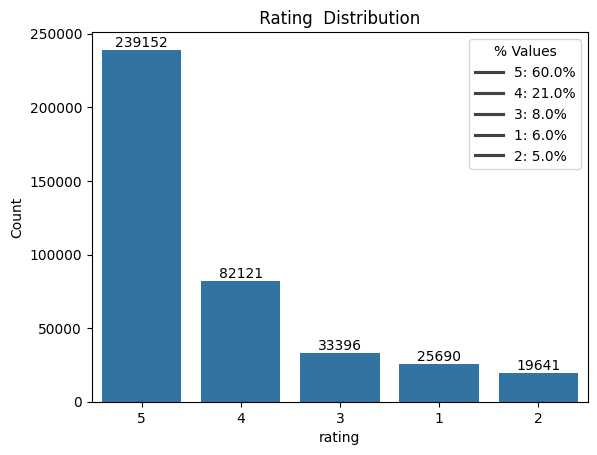

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating değerlerinin frekanslarını sayısını alma
num = df['rating'].value_counts()

ax = sns.barplot(x=num.index, y=num.values, order=num.index)
ax.bar_label(ax.containers[0])
plt.title(' Rating  Distribution ')
plt.ylabel('Count')

# Yüzdelik değerleri hesapla
yuzde = (num / num.sum()).round(2)
l = [f'{i}: {v*100}%' for i, v in yuzde.items()]
plt.legend(l, title="% Values")
plt.show()

Text(0.5, 1.0, 'corelasyon map')

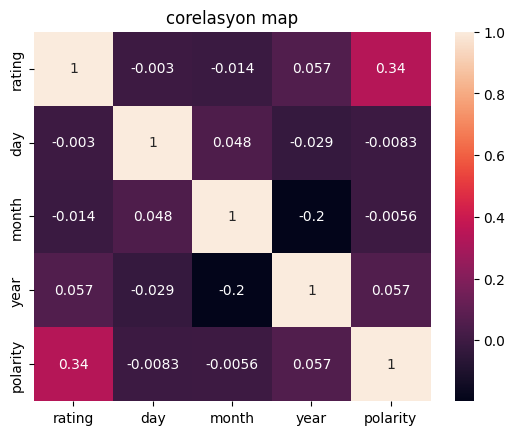

In [101]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('corelasyon map')

In [20]:
### Max date and min date , firt command
df.max()

,0
text,~~~~~~~~~~~~~~Summary of my installation~~~~~~...
rating,5
day,31
month,12
year,2014


In [21]:
df.min()

,0
text,
rating,1
day,1
month,1
year,1999


### Distribution of Year

In [22]:
count=df[['year']].value_counts()

year=pd.DataFrame({'Total':count,"Percentage":((count/count.sum())*100).round(2)})
year

,Total,Percentage
year,,
2013,140447,35.11
2014,81483,20.37
2012,66670,16.67
2011,41073,10.27
2010,24415,6.10
2009,16621,4.16
2008,11710,2.93
2007,8545,2.14
2006,3562,0.89


### Distribution of Month

In [23]:
count=df['month'].value_counts()

month=pd.DataFrame({"Total":count,"Percentage":(count/count.sum()*100).round(2)})
month.reset_index()
month

,Total,Percentage
month,,
1,46148,11.54
12,43389,10.85
3,37858,9.46
2,36710,9.18
4,34689,8.67
5,33795,8.45
6,32579,8.14
7,31654,7.91
11,29851,7.46


### Distribution of Days

In [24]:
count=df['day'].value_counts()

day=pd.DataFrame({"Total":count,"Percentage":(count/count.sum()*100).round(2)})
day

,Total,Percentage
day,,
2,13711,3.43
7,13641,3.41
3,13549,3.39
6,13453,3.36
27,13441,3.36
9,13424,3.36
13,13406,3.35
17,13393,3.35
28,13368,3.34


# Rating Pie Distribution

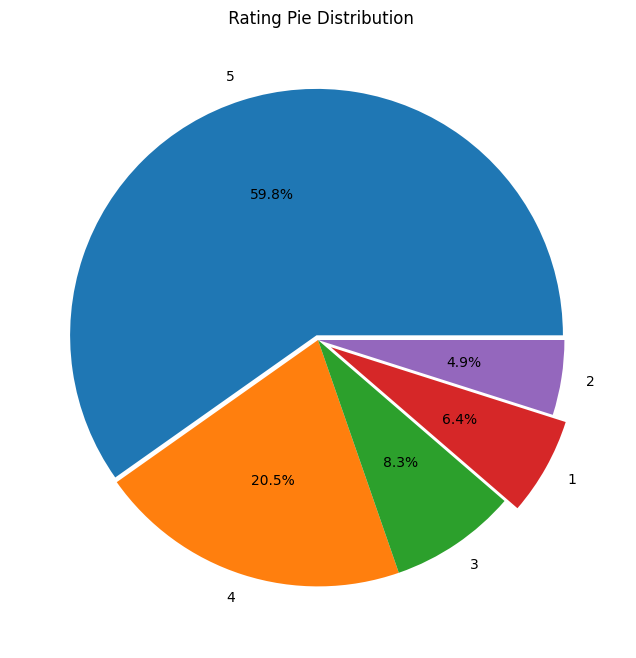

In [25]:
c = df['rating'].value_counts()
sizes = c.values
labels = c.index


# Pasta grafik
plt.figure(figsize=(8, 8))
plt.pie(sizes,
        labels=labels
        ,autopct='%1.1f%%',
        labeldistance=1.1,
        explode=(0.02,0,0,0.06,0))
plt.title(' Rating Pie Distribution')
plt.show()

# Text Processing

In [26]:
# First and Last Command in the data
df['text'][1],"*****1 - 400.000******",df['text'][399000]

("I ordered one for my wife and one for me. After reading all the negative reviews on picture quality, I almost returned them on arrival. But I didn't and both me and my wife weer pleasantly amazed at the ease of use and high quality pictures we got immediately. I suspect people play with the settings and especially the high iso one and end of with less resolution for low light which may not be needed anyway. The auto function works extemely well as it select the best scene, focus and shutter. All our initial pictures were just perfect, even under less than idea conditions. For my book I give it an overall 4.5, and that is just because the camera is still new and still learning the full features, I would recommencd it as others have. None were blurred.",
 '*****1 - 400.000******',
 'This contraption looks very serious and industrial.  I like the black color and the way it looks.  The 8 on the side pivots up and down to make room for big plug items in the middle.')

In [27]:
def preprocess_text(df):
  df['text'] = df['text'].str.lower()  # Tüm metni küçük harfe dönüştürür
  df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)  # Noktalama işaretlerini kaldırır
  df['text'] = df['text'].str.replace('\d+', '', regex=True)  # Rakamları kaldırır
  df['text'] = df['text'].str.replace('\n', ' ', regex=True)  # Satır sonlarını boşlukla değiştirir
  df['text'] = df['text'].str.replace('\r', '', regex=True)  # Carriage return karakterlerini kaldırır
  df['text'] = df['text'].str.replace('\s+', ' ', regex=True)  # Fazla boşlukları tek boşlukla değiştirir
  df['text'] = df['text'].str.strip()  # Başta ve sondaki boşlukları kaldırır
  return df

df = preprocess_text(df)

In [28]:
df.shape

(400000, 5)

In [29]:
df['text'][1]

'i ordered one for my wife and one for me after reading all the negative reviews on picture quality i almost returned them on arrival but i didnt and both me and my wife weer pleasantly amazed at the ease of use and high quality pictures we got immediately i suspect people play with the settings and especially the high iso one and end of with less resolution for low light which may not be needed anyway the auto function works extemely well as it select the best scene focus and shutter all our initial pictures were just perfect even under less than idea conditions for my book i give it an overall and that is just because the camera is still new and still learning the full features i would recommencd it as others have none were blurred'

# Sentiment Analysis
kısca :  duygulara göre puanlama yapıyoruz pozitif negatif diğe   bunun için TextBlob Kütüphanesini kullanmak gerekiyor

burada verimizi res=TextBlob(df['text'][1]) alıyoruz ve
res.sentiment diyince de sonuç olarak bize :
Sentiment(polarity=0.3, subjectivity=0.45)
veriyor

### nunlar polarity POZİTİF' mi değil mi
### SUBJECTİVİTY ise bize Objectif-Subjektif ayrımı yapıyor

### bu skor değerleri - 1 ve 1 arasında değerlendiriliyor


In [30]:
# example
from textblob import TextBlob
example=TextBlob(df['text'][1])
df['text'][1],example.sentiment


('i ordered one for my wife and one for me after reading all the negative reviews on picture quality i almost returned them on arrival but i didnt and both me and my wife weer pleasantly amazed at the ease of use and high quality pictures we got immediately i suspect people play with the settings and especially the high iso one and end of with less resolution for low light which may not be needed anyway the auto function works extemely well as it select the best scene focus and shutter all our initial pictures were just perfect even under less than idea conditions for my book i give it an overall and that is just because the camera is still new and still learning the full features i would recommencd it as others have none were blurred',
 Sentiment(polarity=0.22042424242424244, subjectivity=0.4589696969696969))

In [31]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0.2:
        sentiment = 'pozitif'
    elif polarity < -0.2:
        sentiment = 'negatif'
    else:
        sentiment = 'natural'

    polar = (polarity + 1) * 50
    return pd.Series([sentiment, polar])

In [32]:
df[['sentiment', 'polarity']] = df['text'].apply(lambda x: get_sentiment(x))

In [33]:
df.shape

(400000, 7)

# Detecting Language  - Dil algılama

## Boşlık barındıran değerleri silme

In [34]:
short_text_df = df[df['text'].apply(lambda x: len(x.strip()) < 5)]['text']
short_text_df.shape

(283,)

In [35]:
df[(df['polarity'] == 50) & (df['sentiment'] == 'neutral')].shape
# bunları çöpe atalım

(0, 7)

In [36]:
df.drop(df[(df['polarity'] == 50) & (df['sentiment'] == 'neutral')].index, inplace=True)


In [37]:
df.shape

(400000, 7)

In [38]:
df.to_csv('df_sentimentli_.csv',index=False)

In [39]:
# Amazon yorumlar ile ilgili dil algılama çalışmadı

In [40]:
df3=pd.read_csv('/content/df_sentimentli.csv')
df3.shape

df=df3.copy()

## <font color="blue">Applying Stemming & Lemmatisation
    
    Stema Cümleye Ayırmaya yarar
    lemma Kökleri bulmaya yarar

In [41]:
#pip install nltk spacy
import spacy
from nltk.stem import PorterStemmer,WordNetLemmatizer
import nltk

# NLTK'nın veri setlerini indirme
nltk.download('punkt')
nltk.download('wordnet')

stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
# Stemming fonksiyonu
def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Lemmatizasyon fonksiyonu
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]  # 'v' -> fiil olarak işaretlenir
    return ' '.join(lemmatized_tokens)

In [43]:
df.head()

,text,rating,day,month,year,sentiment,polarity
0,well after trying out some box towersthat soun...,5,7,6,2011,natural,56.866162
1,i ordered one for my wife and one for me after...,5,24,12,2009,pozitif,61.021212
2,muy buen producto a full en juegos fhd no hay ...,5,29,8,2011,pozitif,67.500000
3,the sound quality of this unit is phenomenal w...,5,24,2,2009,pozitif,61.165966
4,it is good on keeping your cpu cool also downt...,4,27,5,2014,pozitif,76.250000


In [7]:
df.isnull().sum()
df.dropna(inplace=True)

In [45]:
df['stemmed'] = df['text'].apply(stem_text)

In [46]:
df['lemmatized'] = df['text'].apply(lemmatize_text)

In [47]:
df.to_csv('df_stem_lemma_neow.csv',index=False)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df3=pd.read_csv('df_stem_lemma_neow.csv')
df3.shape

df=df3.copy()

In [7]:
df.shape

(399757, 9)

In [50]:
df.isnull().sum()
#df.lemmatized.isnull().sum()
#df = df.dropna(subset=['lemmatized'])


,0
text,0
rating,0
day,0
month,0
year,0
sentiment,0
polarity,0
stemmed,0
lemmatized,0


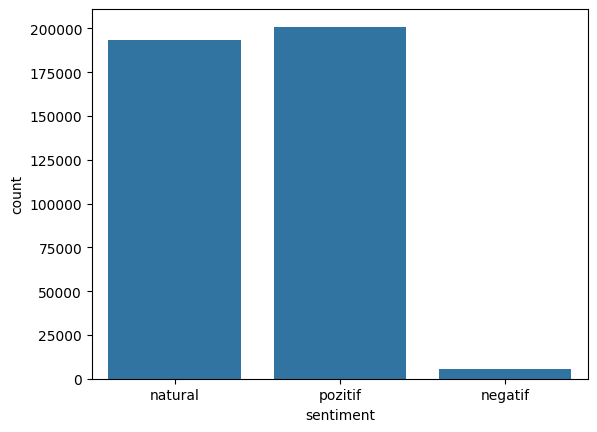

In [51]:
ax=sns.countplot(data=df,x='sentiment')

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import neattext.functions as nfx

# Modelling

In [22]:
        # Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

classifiers = [
    LogisticRegression,
    KNeighborsClassifier,
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    MultinomialNB,
    BernoulliNB
]

In [10]:
df.head(3)

,text,rating,day,month,year,sentiment,polarity,stemmed,lemmatized
0,well after trying out some box towersthat soun...,5,7,6,2011,natural,56.866162,well after tri out some box towersthat sound l...,well after try out some box towersthat sound l...
1,i ordered one for my wife and one for me after...,5,24,12,2009,pozitif,61.021212,i order one for my wife and one for me after r...,i order one for my wife and one for me after r...
2,muy buen producto a full en juegos fhd no hay ...,5,29,8,2011,pozitif,67.500000,muy buen producto a full en juego fhd no hay p...,muy buen producto a full en juegos fhd no hay ...


In [54]:
import neattext.functions as nfx
df['lemmatized']=df['lemmatized'].apply(lambda x : nfx.normalize(x))

In [55]:
df.reset_index(drop=True, inplace=True)

In [11]:
# Dataset'i X (feature) ve y (target) olarak ayırma
x = df['lemmatized']  # Özellik olarak lemmatize edilmiş metin verisini kullanıyoruz
y = df['sentiment']   # Hedef olarak duygu etiketlerini kullanıyoruz

## Count Vectırizer

In [12]:
Vector=CountVectorizer(ngram_range=(1,2),max_features=45000,stop_words='english')
TFIDF=TfidfVectorizer(ngram_range=(1, 2),max_features=45000,stop_words='english')

In [13]:
X = Vector.fit_transform(x)

# Örneğin ilk 5 satırı gösterme (dense format için önce todense() kullanmanız gerekebilir)
sam_n = X[:5].todense() #sadece 5 satır göstermek için ayarlandı

feature_n = Vector.get_feature_names_out()

# Dense matrisleri DataFrame'e dönüştür
df_vector = pd.DataFrame(sam_n, columns=feature_n)

In [14]:
df_vector

,__,__ __,aa,aa aaa,aa batteries,aa battery,aa nimh,aaa,aaa batteries,aaa battery,...,zuiko,zuiko mm,zumo,zune,zune hd,zune software,zunes,zvox,zx,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Her sınıflandırıcı için model eğitme ve değerlendirme
def modeling(gelen, method_name):
    X_train, X_test, y_train, y_test = train_test_split(gelen, y, test_size=0.3, random_state=42)

    results = []

    for classifier in classifiers:
        model = classifier()  # Modeli başlatma
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        ac = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Classifier': classifier.__name__,
            'Method': method_name,
            'Accuracy': ac,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1
        })

    return pd.DataFrame(results)

In [17]:
# Çalışmadı
#result = modeling(X, "CountVectorizer with Ngram" )

In [102]:
#result

In [18]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
y=df['sentiment']
x,x2,y,y2= tts(X,y,test_size=0.3,random_state=42)
model=LogisticRegression()
model.fit(x,y)
pred=model.predict(x2)
cor=confusion_matrix(pred,y2)
cor

array([[49024,  1125,  8479],
       [  280,   460,    14],
       [ 8718,    49, 51779]], dtype=int64)

In [99]:
print(classification_report(pred,y2))

              precision    recall  f1-score   support

     natural       0.84      0.84      0.84     58628
     negatif       0.28      0.61      0.39       754
     pozitif       0.86      0.86      0.86     60546

    accuracy                           0.84    119928
   macro avg       0.66      0.77      0.69    119928
weighted avg       0.85      0.84      0.85    119928



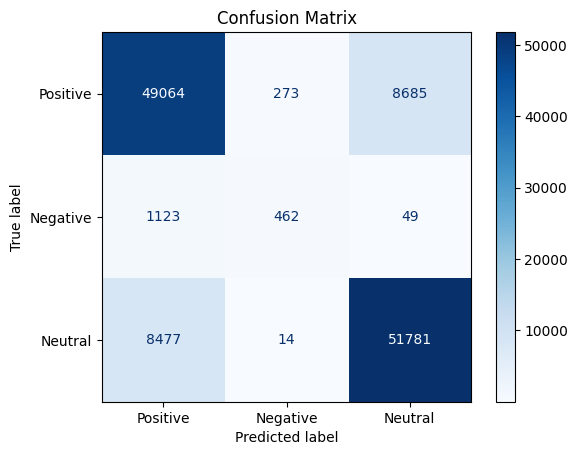

In [65]:
cm = confusion_matrix(y2, pred )
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive', 'Negative', 'Neutral'])

cmd.plot(cmap="Blues")
plt.title('Confusion Matrix')

plt.show()

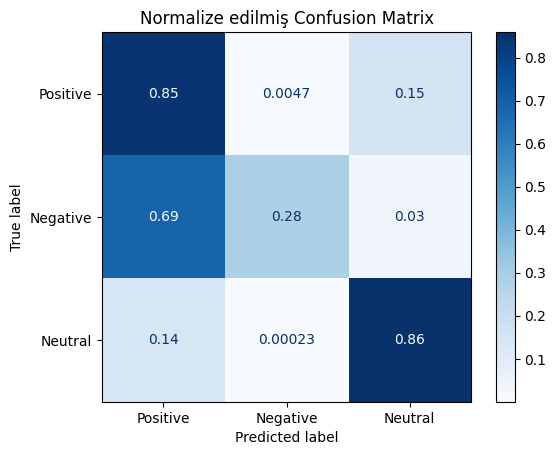

In [67]:
cm = confusion_matrix(y2, pred,normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive', 'Negative', 'Neutral'])

cmd.plot(cmap='Blues')
plt.title('Normalize edilmiş Confusion Matrix')
plt.show()

# WordCloud 5 - 1 yildiz için

In [23]:
df_like = df[df['rating'] == 5]

In [24]:
df_dislike = df[df['rating'].isin([1, 2])]

In [59]:
from PIL import Image
from wordcloud import STOPWORDS,WordCloud
import numpy as np

def cloud(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('like.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask,contour_color='green',contour_width=10)
    wc.generate(''.join(data))
    plt.imshow(wc)

    plt.title(f"  İşlenen Metin Sayısı: {len(data)}")
    plt.axis('off')
    plt.show()

In [60]:
def cloud2(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('dislike.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask,contour_color='red',contour_width=10)
    wc.generate(''.join(data))
    plt.imshow(wc)

    plt.title(f"  İşlenen Metin Sayısı: {len(data)}")
    plt.axis('off')
    plt.show()

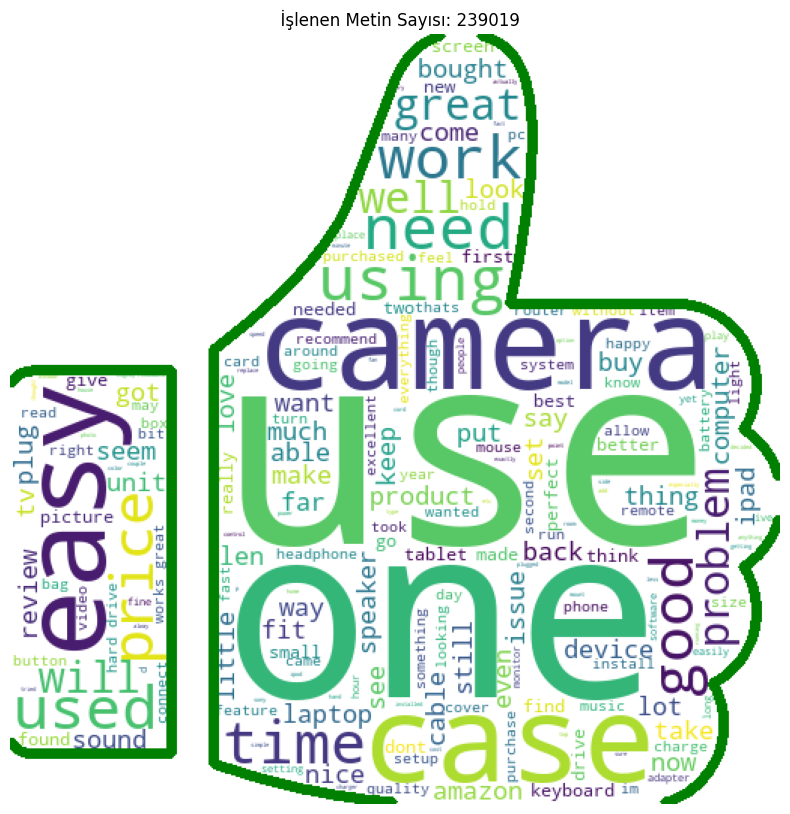

In [61]:
cloud(df_like['text'],'white')

In [64]:
df_like.shape ,df_dislike.shape

((239019, 9), (45295, 9))

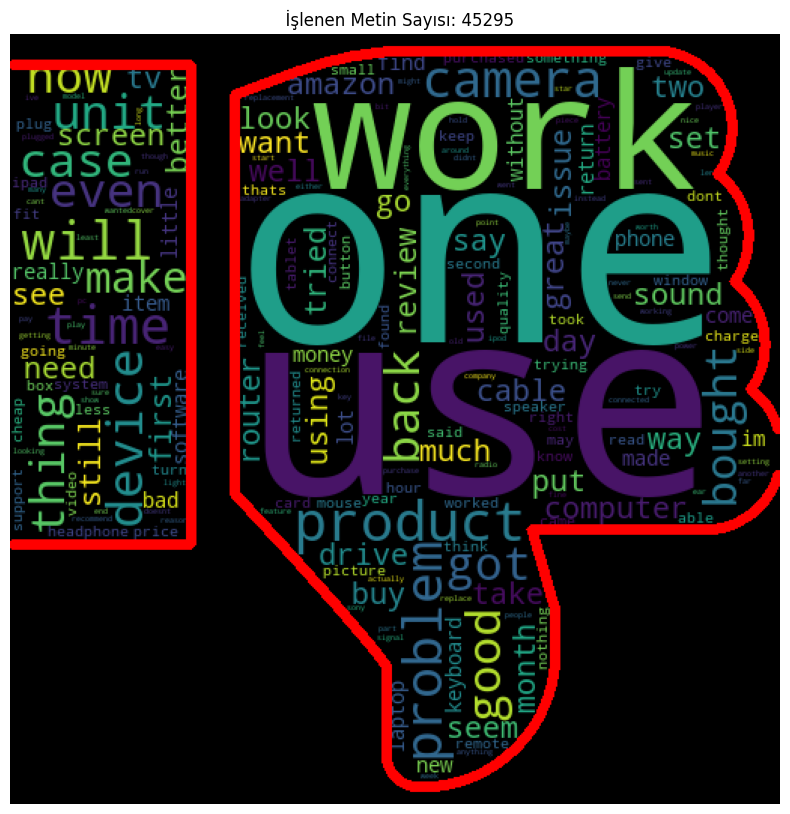

In [65]:
cloud2(df_dislike['text'],'black')

# Neattext

In [20]:
import neattext as nt
import neattext.functions as nfx
from collections import Counter 

s=''.join(df['text'].tolist())  #hepsini tek bir yazı yaptık 
Counter(s.split()) 
s2=nfx.remove_stopwords(s)

Text(0, 0.5, 'Kelime')

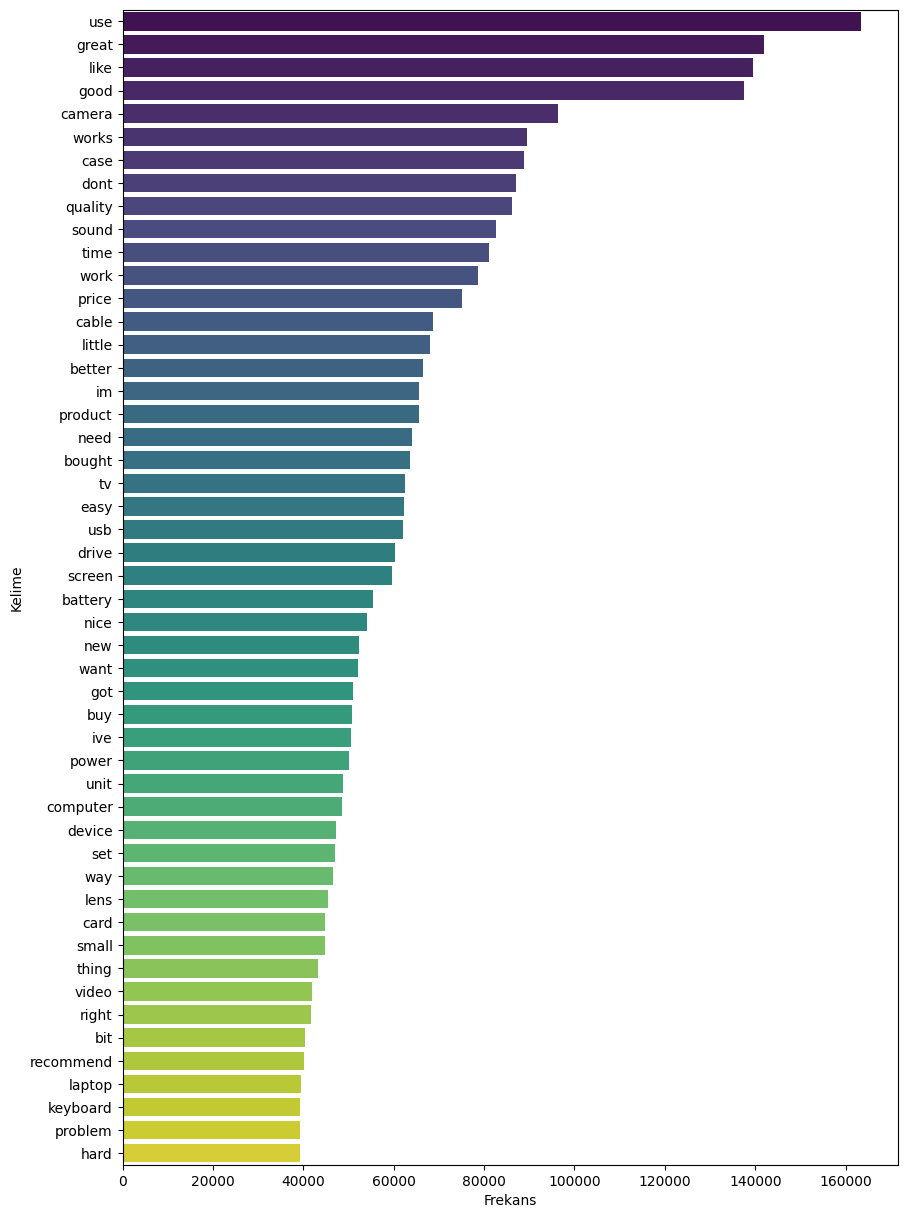

In [21]:
# Grafiğini çizme
data=pd.DataFrame(Counter(s2.split()).most_common(50))
#sayi  # 50  En çok tekaralanan kelime

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))
sns.barplot(data=data,x=1, y=0, palette='viridis')
plt.xlabel('Frekans')
plt.ylabel('Kelime')

In [13]:
df['sentiment'].unique()

from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


In [14]:
olumlu=df[(df['sentiment'] == 'pozitif') & (df['rating'] >= 4)]['lemmatized']

olumsuz=df[(df['sentiment'] == 'negatif') & (df['rating']  < 3)]['lemmatized']

# En çok tekar edenler 

In [15]:

# Üç kelimelik ifadeleri (trigramlar) bulmak
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=20)

trigram_counts = trigram_vectorizer.fit_transform(olumlu)
trigram_counts = trigram_counts.toarray().sum(axis=0)
trigrams = trigram_vectorizer.get_feature_names_out()
trigram_freq = dict(sorted(zip(trigrams, trigram_counts), key=lambda item: item[1], reverse=True))

print("Olumlular için en çok kullanılan 3 kelime")
trigram_freq

Olumlular için en çok kullanılan 3 kelime


{'work just fine': 1600,
 'work like charm': 858,
 'highly recommend product': 629,
 'sound quality good': 572,
 'just make sure': 542,
 'work great use': 524,
 'cable work great': 476,
 'good sound quality': 401,
 'product great price': 394,
 'im happy purchase': 390,
 'sound quality great': 381,
 'great product great': 358,
 'great sound quality': 354,
 'work great easy': 354,
 'micro sd card': 338,
 'product work great': 338,
 'sound quality excellent': 336,
 'external hard drive': 332,
 'great price great': 329,
 'fit like glove': 308}

In [90]:
# Üç kelimelik ifadeleri (trigramlar) bulmak
five_vector = CountVectorizer(ngram_range=(5, 5), stop_words='english', max_features=20)

five_counts = five_vector.fit_transform(olumlu)
five_counts = five_counts.toarray().sum(axis=0)
five_grams = five_vector.get_feature_names_out()
five_freq = dict(sorted(zip(five_grams, five_counts), key=lambda item: item[1], reverse=True))

print("Olumlular için en çok kullanılan 5 kelime")
five_freq

Olumlular için en çok kullanılan 5 kelime


{'didnt want spend lot money': 31,
 'kb kbs kb kbs kb': 26,
 'kbs kb kbs kb kbs': 25,
 'comfortable wear long periods time': 20,
 'la la la la la': 19,
 'work work work work work': 19,
 'copy item test fair honest': 18,
 'free copy item test fair': 18,
 'iopsrandom write kb qd mbs': 18,
 'kb qd mbs iopsrandom write': 18,
 'mbs iopsrandom write kb qd': 18,
 'provide free copy item test': 18,
 'qd mbs iopsrandom write kb': 18,
 'read kb qd mbs iopsrandom': 18,
 'supply sample test evaluation promise': 16,
 'dont want spend lot money': 15,
 'high speed hdmi cable ethernet': 15,
 'camera easy use great picture': 14,
 'image stabilize zoom inch lcd': 14,
 'optical image stabilize zoom inch': 14}

In [85]:
# Üç kelimelik ifadeleri (trigramlar) bulmak
trigram_counts = trigram_vectorizer.fit_transform(olumsuz)
trigram_counts = trigram_counts.toarray().sum(axis=0)
trigrams = trigram_vectorizer.get_feature_names_out()
trigram_freq = dict(sorted(zip(trigrams, trigram_counts), key=lambda item: item[1], reverse=True))

print("Olumsuzlar için en çok kullanılan 3 kelime")
trigram_freq

Olumsuzlar için en çok kullanılan 3 kelime


{'dont waste money': 33,
 'waste time money': 21,
 'save money buy': 9,
 'waste money time': 9,
 'dont waste time': 8,
 'just stop work': 8,
 'customer service horrible': 7,
 'product description say': 7,
 'complete waste money': 5,
 'just throw away': 5,
 'just waste money': 5,
 'make difficult use': 5,
 'maybe just bad': 5,
 'samsung galaxy tab': 5,
 'time try use': 5,
 'usb flash drive': 5,
 'waste money buy': 5,
 'end throw away': 4,
 'stop work week': 4,
 'waste money like': 4}

In [86]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [88]:
# NER işlemi uygulama fonksiyonu
#def extract_entities(text):
#    doc = nlp(text)
 #   entities = [(entity.text, entity.label_) for entity in doc.ents]
  #  return entities

# df['text'] sütununa NER uygulayın ve sonuçları yeni bir sütuna kaydedin
# df['entities'] = df['text'].apply(extract_entities)

In [ ]:
# Sonucu göster
#df[['text', 'entities']]


# Sonuca bakacak olursak : 

## olumsuz yorumalrda - (" Müşeteri hizmetleri","Fiyat","ürün Açıklaması ") gibi özelliklerinden şikayet etmişler 

## olumlular ise - ("Tavsiyeler","Beğnilen Özellikler","Kullanıcı deneyimleri")   gibi özellikler ön planda 

## olumsuz yorumlara bakarak daha iyi sonuçlar elde etmek için çalışmalar yapılabilir örneğin :Müşteri hizmetleri gibi
